In [1]:
## gradient descent (GD) 和 stochastic gradient descent (SGD)

### 1. GD的推导(一维梯度下降)
根据泰勒公式展开式，设
$$ f(x+\epsilon) \approx f(x) + \epsilon \ f^{'}(x) $$ 

令常数 $\eta \gt 0$，$\vert \ \eta f^{'}(x) \ \vert$足够小，$\epsilon=-\eta f^{'}(x) $，则有

$$ f(x - \eta f^{'}(x)) \approx f(x) - \eta \ f^{'}(x)^2 $$ 

如果导数$ f^{'}(x) \ne 0 $， $ \eta \ f^{'}(x)^2 \gt 0 $，则有

$$ f(x - \eta f^{'}(x)) \ \lesssim \ f(x) $$ 

连续地让$x \leftarrow x - \eta \ f^{'}(x) $，则 $ f(x) $的值将不断变小，即向（局部）极小值的方向移动。

下面以目标函数$f(x)=x^2$为例来看一看梯度下降是如何工作的.


In [8]:
import numpy as np
import torch
import math
import sys
sys.path.append('../d2lzh/')
import d2lzh_pytorch as d2l

In [11]:
def gd(eta):   # eta > 0, as learning rate
    x = 10
    results = [x]
    for i in range(10):
        x -= eta * 2 * x  # 不断更新当前x值
        results.append(x)
    print('epoch 10, x:', x)
    return results

res = gd(0.2)

epoch 10, x: 0.06046617599999997


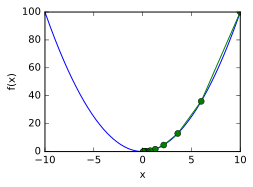

In [13]:
# 绘制轨迹
def show_trace(res):
    n = max(abs(min(res)), abs(max(res)), 10)
    f_line = np.arange(-n, n, 0.1)
#     d2l.set_figsize()
    d2l.plt.plot(f_line, [x * x for x in f_line])
    d2l.plt.plot(res, [x * x for x in res], '-o')
    d2l.plt.xlabel('x')
    d2l.plt.ylabel('f(x)')
    d2l.plt.show()
    
show_trace(res)

epoch 10, x: 3.4867844009999995


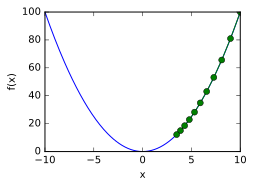

In [14]:
### 学习率（人工设定的超参数）
show_trace(gd(0.05))  # 学习率设置过小

epoch 10, x: 25.937424601000032


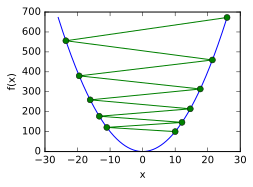

In [21]:
show_trace(gd(1.05))     # 学习率设置过大

### 2. GD的推导(多维梯度下降)

#### 导数（一元坐标轴方向）　/　偏导数（沿多元函数变量坐标轴的导数）　/　方向导数（沿任意方向的导数）　/　梯度（下降速度最快的方向的导数）

上述目标函数的是$\ f: \mathbb{R} \rightarrow \mathbb{R}$，现在假设目标函数$\ f: \mathbb{R}^d \rightarrow \mathbb{R}$，输入是一个$d$维向量$\boldsymbol{x} = [x_1, x_2, \ldots, x_d]^\top$，则目标函数相对于$\boldsymbol{x}$的梯度是一个由$d$个偏导数组成的向量

$$\nabla_{\boldsymbol{x}} f(\boldsymbol{x}) = \bigg[\frac{\partial f(\boldsymbol{x})}{\partial x_1}, \frac{\partial f(\boldsymbol{x})}{\partial x_2}, \ldots, \frac{\partial f(\boldsymbol{x})}{\partial x_d}\bigg]^\top.$$

为表示简洁，用$\nabla f(\boldsymbol{x})$代替$\nabla_{\boldsymbol{x}} f(\boldsymbol{x})$。为了测量$\ f \ $沿着单位向量$\ \boldsymbol{u}$（即$  \ |\boldsymbol{u}|=1$）方向上的变化率，在多元微积分中，定义$\ f \ $在$ \ \boldsymbol{x}$上沿着$ \ \boldsymbol{u}$方向的**方向导数**为

$$\text{D}_{\boldsymbol{u}} f(\boldsymbol{x}) = \lim_{h \rightarrow 0} \frac{f(\boldsymbol{x} + h \boldsymbol{u}) - f(\boldsymbol{x})}{h}  = \nabla f(\boldsymbol{x}) \cdot \boldsymbol{u}.$$

方向导数$\text{D}_{\boldsymbol{u}} f(\boldsymbol{x})$给出了$\ f \ $在$\boldsymbol{x}$上沿着所有可能方向的变化率。为了最小化$\ f \ $，我们希望找到$\ f \ $能被降低最快的方向。因此，我们可以通过单位向量$\boldsymbol{u}$来最小化方向导数$\text{D}_{\boldsymbol{u}} f(\boldsymbol{x})$。

由于$$\text{D}_{\boldsymbol{u}} f(\boldsymbol{x}) = |\nabla f(\boldsymbol{x})| \cdot |\boldsymbol{u}| \cdot \text{cos} (\theta) = |\nabla f(\boldsymbol{x})| \cdot \text{cos} (\theta)$$

其中$\theta$为梯度$\nabla f(\boldsymbol{x})$和单位向量$\boldsymbol{u}$之间的夹角，当$\theta = \pi$时，$\text{cos}(\theta)$取得最小值$-1$。因此，当$\boldsymbol{u}$在梯度方向$\nabla f(\boldsymbol{x})$的相反方向时，方向导数$\text{D}_{\boldsymbol{u}} f(\boldsymbol{x})$被最小化。因此，我们可能通过梯度下降算法来不断降低目标函数$f$的值：

$$\boldsymbol{x} \leftarrow \boldsymbol{x} - \eta \nabla f(\boldsymbol{x}).$$

同样，其中$\eta$（取正数）称作学习率。

综上所述，我们的目的是让$\ f \ $在曲面的某一个点开始，选定一个能最快降低到最小值的方向。那么，每走一步，应该如何选择这个方向呢？

$\boldsymbol{u}$ : 函数$\ f \ $在$x$上某一个点的单位方向向量，$\nabla f(\boldsymbol{x})$: 目标函数$f$相对于$x$的梯度。 

* 定义一个值$\boldsymbol{u}$，用于描述$\ f \ $的单位向量$\boldsymbol{u}$。（多个方向则需要定义多个$\boldsymbol{u}$）

* 定义一个值（即，方向导数）$\text{D}_{\boldsymbol{u}} f(\boldsymbol{x}) $，它能够描述$\ f \ $在单位向量$\boldsymbol{u}$上的变化率。

* 从许多方向中选定其中一个方向迈进。联系上面的一维梯度下降算法的说法，梯度值（导数值）降低的方向就是整个函数$\ f \ $往最小值变动的方向。而对于这里的二维（甚至高维）梯度下降算法来说，方向导数降低的方向就是整个函数$\ f \ $往最小值变动的方向，且方向导数降低得越小（取最小的值），往函数$\ f \ $最小值走的速度也越快。

* 那怎么取方向导数最小值呢？ 只需要令$\theta = \pi$即可，因为此时$\text{cos}(\theta) = -1,\ \text{D}_{\boldsymbol{u}} f(\boldsymbol{x})$取得最小值。

* 回到方向这个问题上来，因为$\theta $是梯度$\nabla f(\boldsymbol{x})$和单位向量$\boldsymbol{u}$之间的夹角，为了更快到达最低点，两者的方向必然要相反。

In [23]:
def train_2d(trainer):
    x1, x2, s1, s2 = -5, -2, 0, 0   # x1,x2为初始值
    results = [(x1, x2)]
    for i in range(20):
        x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print('epoch %d, x1 %f, x2 %f' % (i+1, x1, x2))
    print(results)
    return results

def show_trace_2d(f, results):
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = np.meshgrid(np.arange(-5.5, 1.0, 0.1), np.arange(-3.0, 1.0, 0.1))
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')
    d2l.plt.show()

epoch 20, x1 -0.057646, x2 -0.000073
[(-5, -2), (-4.0, -1.2), (-3.2, -0.72), (-2.56, -0.432), (-2.048, -0.2592), (-1.6384, -0.15552), (-1.31072, -0.09331199999999999), (-1.0485760000000002, -0.055987199999999994), (-0.8388608000000002, -0.033592319999999995), (-0.6710886400000001, -0.020155391999999994), (-0.5368709120000001, -0.012093235199999997), (-0.4294967296000001, -0.007255941119999998), (-0.3435973836800001, -0.004353564671999998), (-0.27487790694400005, -0.0026121388031999987), (-0.21990232555520003, -0.0015672832819199991), (-0.17592186044416003, -0.0009403699691519995), (-0.140737488355328, -0.0005642219814911997), (-0.11258999068426241, -0.00033853318889471976), (-0.09007199254740993, -0.00020311991333683184), (-0.07205759403792794, -0.0001218719480020991), (-0.057646075230342354, -7.312316880125945e-05)]


/home/tpg/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6554: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/tpg/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6554: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


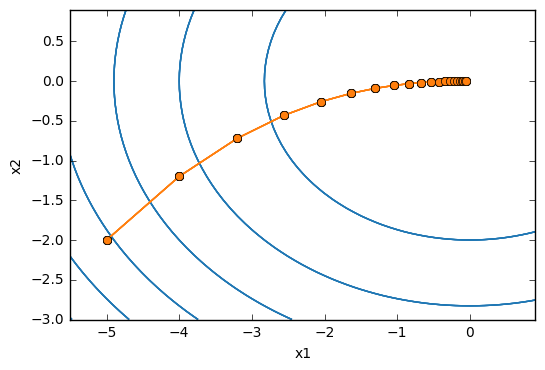

In [24]:
eta = 0.1

def f_2d(x1, x2): # objective function
    return x1 ** 2 + 2 * x2 ** 2

def gd_2d(x1, x2, s1, s2):   # 
    return (x1 - eta * 2 * x1, x2 - eta * 4 * x2, 0, 0)

show_trace_2d(f_2d, train_2d(gd_2d))

In [25]:
### 随机梯度下降

随机梯度下降是针对梯度下降中计算量随着训练数据的增加而线性增长的一种改进．具体体现在，梯度下降是目标函数（各样本的损失之和）对各个样本的训练出来的权重求梯度，然后将这些一个个求出来的梯度取均值，再进行梯度更新．**（损失函数是分样本来进行的，计算梯度也是分样本来进行的，梯度更新则是计算这些梯度的平均值）**

而随机梯度下降是目标函数对各个样本的训练出来的权重求梯度，但只取其中的一个样本对应的梯度来进行更新．因此，减少了总体的计算量．**（损失函数是分样本来进行的，计算梯度也是分样本来进行的，梯度更新则是按均匀分布的方式抽取单个样本的梯度）**

梯度下降：

$$\boldsymbol{x} \leftarrow \boldsymbol{x} - \eta \nabla f(\boldsymbol{x}), \nabla f(\boldsymbol{x}) = \frac{1}{n} \sum_{i = 1}^n \nabla f_i(\boldsymbol{x}).$$

随机梯度下降：

$$\boldsymbol{x} \leftarrow \boldsymbol{x} - \eta \nabla f_i(\boldsymbol{x}).$$

可以看到每次迭代计算的开销从梯度下降的$\mathcal{O}(n)$降到了常数$\mathcal{O}(1)$。值得强调的是，随机梯度$\nabla f_i(\boldsymbol{x})$是对梯度$\nabla f(\boldsymbol{x})$的无偏估计：

$$E_i \nabla f_i(\boldsymbol{x}) = \frac{1}{n} \sum_{i = 1}^n \nabla f_i(\boldsymbol{x}) = \nabla f(\boldsymbol{x}).$$

epoch 20, x1 -0.232178, x2 -0.116285
[(-5, -2), (-3.7651628735519522, -1.279918851817622), (-2.960598849171662, -0.7718032264198232), (-2.4271974460094716, -0.35741478060115944), (-1.8442680787791728, -0.1921308752290562), (-1.3838045126491276, 0.05474612347560284), (-1.3392761664775166, 0.08456285318819173), (-0.9366669017744611, 0.04328127730195057), (-0.8895051020031389, 0.07130106801232294), (-0.6496452673348585, 0.0035183482989633724), (-0.41149208250169433, 0.12536403364385723), (-0.27323083822376415, 0.21783308174555388), (-0.1727772520489827, 0.14404170143344394), (-0.06443121144053239, 0.07805005869141052), (-0.08050896882712025, -0.09879483276440656), (-0.21575662523942687, 0.05093082193019649), (-0.1706973278039446, 0.055882204454619534), (-0.022874826860858788, -0.056723022234441554), (-0.02244935428930289, -0.0774962409251394), (-0.2381727643703914, -0.09038056941345077), (-0.23217818243471955, -0.11628509555368004)]


/home/tpg/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6554: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/tpg/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6554: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


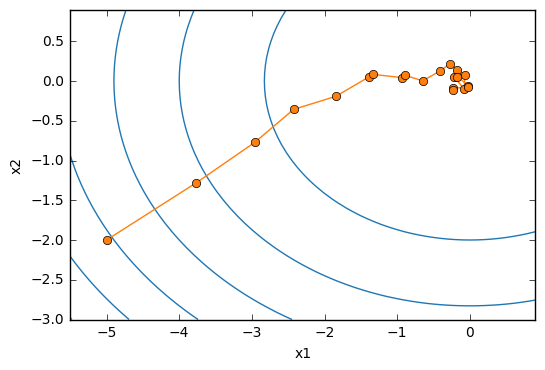

In [26]:
def sgd_2d(x1, x2, s1, s2):
    return (x1 - eta * (2 * x1 + np.random.normal(0.1)),
           (x2 - eta * (4 * x2 + np.random.normal(0.1))), 0, 0.1)

show_trace_2d(f_2d, train_2d(sgd_2d))